In [3]:
import pandas as pd
import numpy as np
supply_chain_data = pd.read_csv('/Users/huangwen/上课资料/智慧物流-订单规划/lesson1/SupplyChain/SupplyChain.csv', encoding='unicode-escape')
#supply_chain_des_data = pd.read_csv('SupplyChain/SupplyChain_Description.csv', encoding='unicode-escape')

In [4]:
supply_chain_data.info()
#一共 180519
#Customer Lname                 180511 
#Customer Zipcode               180516
#Order Zipcode                  24840
#Product Description            0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = supply_chain_data.corr()
fig = plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

从热力图中可以看出

1.Product Category Id 和Category Id完全相关

2.Order Profit Per Order 和 Benefit Per Order 完全相关

3.Order Item Total和Sales per customer完全相关 

4.Order Customer Id和  Customer Id完全相关 

5.Order Item Id和Order Id完全相关 

6.Product Card Id和Order Item Cardprod Id完全相关 

7.Product Price和Order Item Product Price完全相关

先记录完全相关子段，之后数据处理时可以选择其一保留

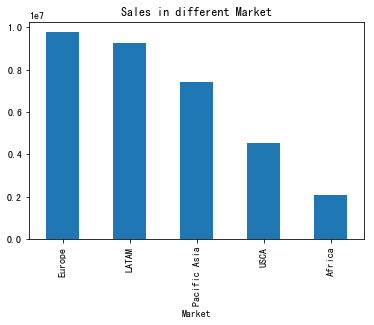

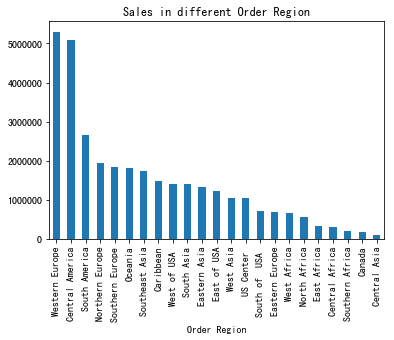

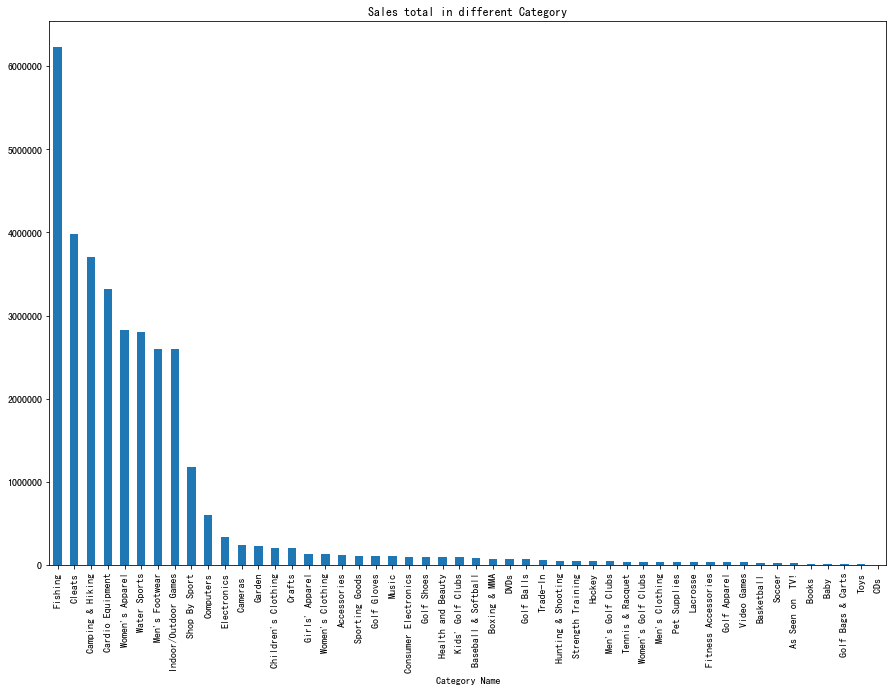

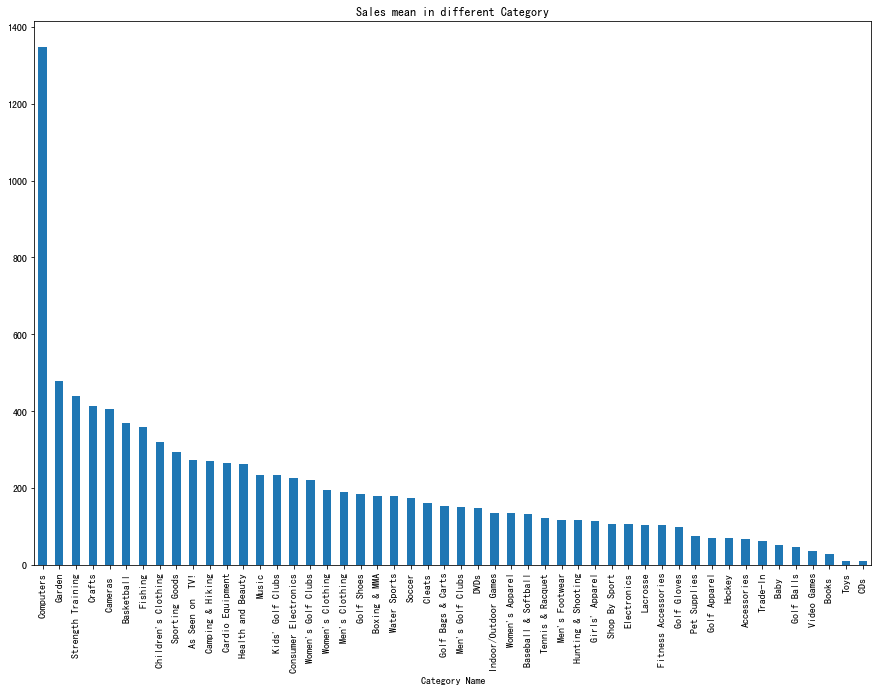

In [6]:
#按照不同的Market
supply_chain_data.groupby(['Market'])['Sales per customer'].sum().sort_values(ascending=False).plot.bar(title='Sales in different Market')
plt.show()
#按照不同的Order Region
supply_chain_data.groupby(['Order Region'])['Sales per customer'].sum().sort_values(ascending = False).plot.bar(title='Sales in different Order Region')
plt.show()
#按照不同的Category Name
supply_chain_data.groupby(['Category Name'])['Sales per customer'].sum().sort_values(ascending = False).plot.bar(figsize=(15,10),title='Sales total in different Category')
plt.show()
supply_chain_data.groupby(['Category Name'])['Sales per customer'].mean().sort_values(ascending = False).plot.bar(figsize=(15,10),title='Sales mean in different Category')

In [7]:
#按照不同的订单时间维度（年，月，星期，小时）的趋势
#supply_chain_data['order date (DateOrders)']
temp = pd.DatetimeIndex(supply_chain_data['order date (DateOrders)'])
supply_chain_data['order_year'] = temp.year
supply_chain_data['order_month'] = temp.month
supply_chain_data['order_week_day'] = temp.weekday
supply_chain_data['order_hour'] = temp.hour
supply_chain_data['order_month_year'] = temp.to_period('M')

In [8]:
supply_chain_data[['order_year','order_month','order_week_day','order_hour','order_month_year']]

,order_year,order_month,order_week_day,order_hour,order_month_year
0,2018,1,2,22,2018-01
1,2018,1,5,12,2018-01
2,2018,1,5,12,2018-01
3,2018,1,5,11,2018-01
4,2018,1,5,11,2018-01
...,...,...,...,...,...
180514,2016,1,5,3,2016-01
180515,2016,1,5,1,2016-01
180516,2016,1,4,21,2016-01
180517,2016,1,4,20,2016-01


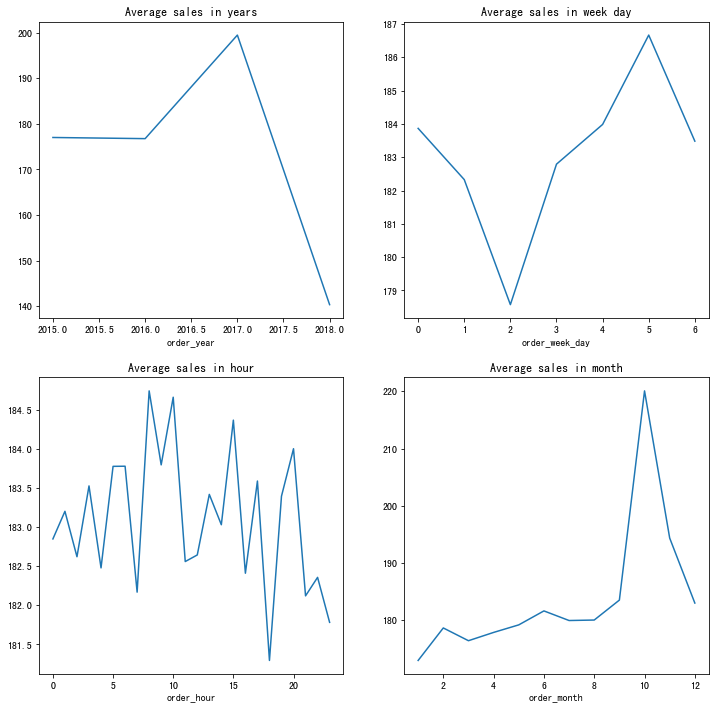

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
supply_chain_data.groupby(['order_year'])['Sales per customer'].mean().plot(figsize=(12,12), title='Average sales in years')
plt.subplot(2,2,2)
supply_chain_data.groupby(['order_week_day'])['Sales per customer'].mean().plot(figsize=(12,12), title='Average sales in week day')
plt.subplot(2,2,3)
supply_chain_data.groupby(['order_hour'])['Sales per customer'].mean().plot(figsize=(12,12), title='Average sales in hour')
plt.subplot(2,2,4)
supply_chain_data.groupby(['order_month'])['Sales per customer'].mean().plot(figsize=(12,12),title='Average sales in month')

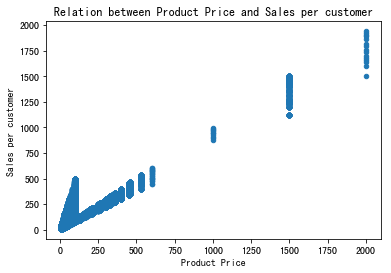

In [10]:
#Product Price与Sales per customer 相关性如何
supply_chain_data.plot.scatter(x='Product Price', y='Sales per customer')
plt.title('Relation between Product Price and Sales per customer')
plt.show()

In [11]:
supply_chain_data[supply_chain_data['Product Price'] > 750]['Product Price'].nunique()
supply_chain_data[supply_chain_data['Product Price'] > 750]['Product Name'].unique()

array(['Dell Laptop', 'SOLE E25 Elliptical', 'SOLE E35 Elliptical'],
      dtype=object)

用scatter意外发现，Sales per customer高的，Product Price其实就只有三个！！！，价格基本集中在600以内。

In [12]:
#用户分层 RFM
supply_chain_data['TotalPrice'] = supply_chain_data['Order Item Quantity'] * supply_chain_data['Order Item Total']
supply_chain_data[['Order Item Quantity','Order Item Total','TotalPrice']]

,Order Item Quantity,Order Item Total,TotalPrice
0,1,314.640015,314.640015
1,1,311.359985,311.359985
2,1,309.720001,309.720001
3,1,304.809998,304.809998
4,1,298.250000,298.250000
...,...,...,...
180514,1,399.980011,399.980011
180515,1,395.980011,395.980011
180516,1,391.980011,391.980011
180517,1,387.980011,387.980011


In [13]:
supply_chain_data['order date (DateOrders)'] = pd.to_datetime(supply_chain_data['order date (DateOrders)'])

In [14]:
supply_chain_data['order date (DateOrders)'].max()
#当下最后一笔记录时间2018-01-31 23:38:00

Timestamp('2018-01-31 23:38:00')

In [29]:
import datetime
present = datetime.datetime(2018,2,1)
customer_seg = supply_chain_data.groupby(['Customer Id']).agg({'order date (DateOrders)':lambda x:(present-x.max()).days, \
                                                               'Order Id':lambda x:len(x), \
                                                               'TotalPrice':lambda x:x.sum()})

In [32]:
customer_seg.rename(columns={'order date (DateOrders)':'R_Value','Order Id':'F_Value', 'TotalPrice':'M_Value'}, inplace=True)

In [33]:
customer_seg

,R_Value,F_Value,M_Value
Customer Id,,,
1,792,1,2362.250061
2,136,10,2842.700073
3,229,18,6143.760057
4,380,14,4370.629991
5,457,7,2993.790032
...,...,...,...
20753,0,1,161.869995
20754,0,1,172.660004
20755,0,1,314.640015


In [34]:
quantiles = customer_seg.quantile([0.25, 0.5, 0.75])

In [51]:
quantiles = quantiles.to_dict()

In [52]:
def R_score(x,R):
    if x <=R[0.25]:
        return 4
    elif x<=R[0.5]:
        return 3
    elif x<=R[0.75]:
        return 3
    else:
        return 1
def FM_score(x, quantiles):
    if x<= quantiles[0.25]:
        return 1
    elif x<=quantiles[0.5]:
        return 2
    elif x<=quantiles[0.75]:
        return 3
    else:
        return 4
customer_seg['R_score'] = customer_seg['R_Value'].apply(R_score, args=(quantiles['R_Value'],))
customer_seg['F_score'] = customer_seg['F_Value'].apply(FM_score, args=(quantiles['F_Value'],))
customer_seg['M_score'] = customer_seg['M_Value'].apply(FM_score, args=(quantiles['M_Value'],)

In [53]:
customer_seg

,R_Value,F_Value,M_Value,R_score,F_score,M_score
Customer Id,,,,,,
1,792,1,2362.250061,1,1,2
2,136,10,2842.700073,3,3,3
3,229,18,6143.760057,3,4,4
4,380,14,4370.629991,1,3,3
5,457,7,2993.790032,1,2,3
...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1
20754,0,1,172.660004,4,1,1
20755,0,1,314.640015,4,1,2


In [55]:
def RFM_User(x):
    if x['R_score'] >2 and x['F_score'] >2 and x['M_score'] >2:
        return '重要价值用户'
    if x['R_score'] >2 and x['F_score'] <=2 and x['M_score'] >2:
        return '重要发展用户'
    if x['R_score'] <=2 and x['F_score'] >2 and x['M_score'] >2:
        return '重要保持用户'
    if x['R_score'] <=2 and x['F_score'] <=2 and x['M_score'] >2:
        return '重要挽留用户'
    if x['R_score'] >2 and x['F_score'] >2 and x['M_score'] <=2:
        return '一般价值用户'
    if x['R_score'] >2 and x['F_score'] <=2 and x['M_score'] <=2:
        return '一般发展用户'
    if x['R_score']<=2 and x['F_score'] >2 and x['M_score'] <=2:
        return '一般保持用户'
    if x['R_score']<=2 and x['F_score'] <=2 and x['M_score'] <=2:
        return '一般挽留用户'
    return ''

customer_seg['Customer_Segmenation'] = customer_seg.apply(RFM_User,axis=1)

In [56]:
customer_seg

,R_Value,F_Value,M_Value,R_score,F_score,M_score,Customer_Segmenation
Customer Id,,,,,,,
1,792,1,2362.250061,1,1,2,一般挽留用户
2,136,10,2842.700073,3,3,3,重要价值用户
3,229,18,6143.760057,3,4,4,重要价值用户
4,380,14,4370.629991,1,3,3,重要保持用户
5,457,7,2993.790032,1,2,3,重要挽留用户
...,...,...,...,...,...,...,...
20753,0,1,161.869995,4,1,1,一般发展用户
20754,0,1,172.660004,4,1,1,一般发展用户
20755,0,1,314.640015,4,1,2,一般发展用户


In [57]:
supply_chain_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [58]:
import pickle
with open('supply_chain_data.pkl','wb') as file:
    pickle.dump(supply_chain_data,file)